<a href="https://colab.research.google.com/github/Aspartamei/Projekt2022_UMwF/blob/main/Projekt2022_UMwF_Wizualizacje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
import pickle
import time
import datetime
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
url = "https://raw.githubusercontent.com/Aspartamei/Projekt2022_UMwF/main/data_final.csv"
data_df = pd.read_csv(url, sep=",")
data_df["Date"] = pd.to_datetime(data_df["Date"])
data_df = data_df.drop('Unnamed: 0', axis = 1)

In [3]:
data_df


,Comp,Date,Close,month_ROR,qtr_ROR,year_ROR,Score,Oil,EUR,JPY
0,UBA,2004-03-24,6.163362,0.083411,NaN,NaN,0.741122,33.01,0.82,106.23
1,UBA,2005-06-15,7.158419,0.087692,0.098211,0.254842,0.803913,54.50,0.83,109.19
2,UBA,2005-06-29,7.281594,0.045381,0.134050,0.223035,0.806620,56.15,0.83,110.41
3,UBA,2005-07-13,7.605220,0.066313,0.228741,0.219617,0.923381,58.27,0.83,111.86
4,UBA,2005-07-27,7.613519,0.062501,0.249711,0.305484,0.923270,58.01,0.83,112.39
...,...,...,...,...,...,...,...,...,...,...
30102,AMED,2010-02-10,56.180000,0.054901,0.305918,0.206022,0.485908,72.54,0.73,89.92
30103,AMED,2017-07-12,58.970001,-0.002406,0.152455,0.160072,0.689752,47.74,0.88,113.16
30104,AMED,2017-07-26,48.689999,-0.120590,0.079048,0.075266,0.677474,50.97,0.85,111.17
30105,AMED,2019-03-13,122.250000,-0.113183,-0.090947,0.683718,0.751574,67.55,0.88,111.17


In [3]:
pure_df = data_df.dropna()

In [17]:
pure_df

,Comp,Date,Close,month_ROR,qtr_ROR,year_ROR,Score,Oil,EUR,JPY
1,UBA,2005-06-15,7.158419,0.087692,0.098211,0.254842,0.803913,54.50,0.83,109.19
2,UBA,2005-06-29,7.281594,0.045381,0.134050,0.223035,0.806620,56.15,0.83,110.41
3,UBA,2005-07-13,7.605220,0.066313,0.228741,0.219617,0.923381,58.27,0.83,111.86
4,UBA,2005-07-27,7.613519,0.062501,0.249711,0.305484,0.923270,58.01,0.83,112.39
5,UBA,2006-06-28,6.979931,-0.016485,-0.101980,-0.024182,0.748544,71.41,0.80,116.36
...,...,...,...,...,...,...,...,...,...,...
30102,AMED,2010-02-10,56.180000,0.054901,0.305918,0.206022,0.485908,72.54,0.73,89.92
30103,AMED,2017-07-12,58.970001,-0.002406,0.152455,0.160072,0.689752,47.74,0.88,113.16
30104,AMED,2017-07-26,48.689999,-0.120590,0.079048,0.075266,0.677474,50.97,0.85,111.17
30105,AMED,2019-03-13,122.250000,-0.113183,-0.090947,0.683718,0.751574,67.55,0.88,111.17


Korelogram

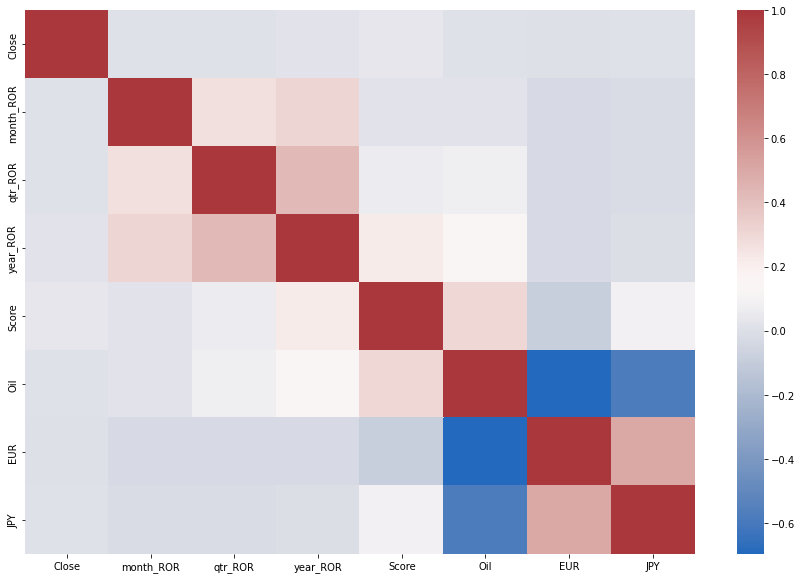

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
corr=pure_df.corr()
sns.heatmap(corr,            
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            cmap='vlag')

Score

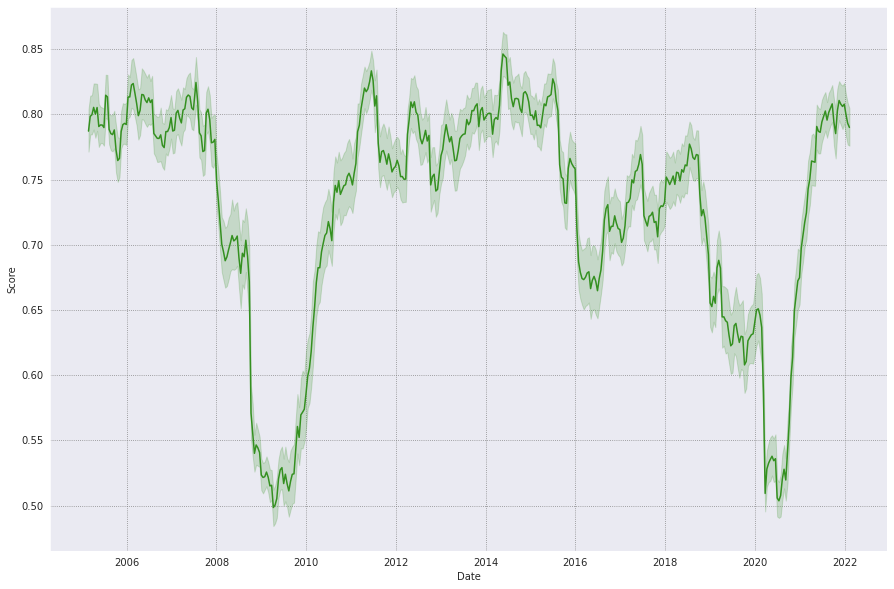

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid", rc={"grid.color": ".5", "grid.linestyle": ":",'xtick.labelsize':15,'ytick.labelsize':15} )
sns.lineplot(x=pure_df["Date"], y = pure_df["Score"], color = '#349020')

Cena Ropy Brent

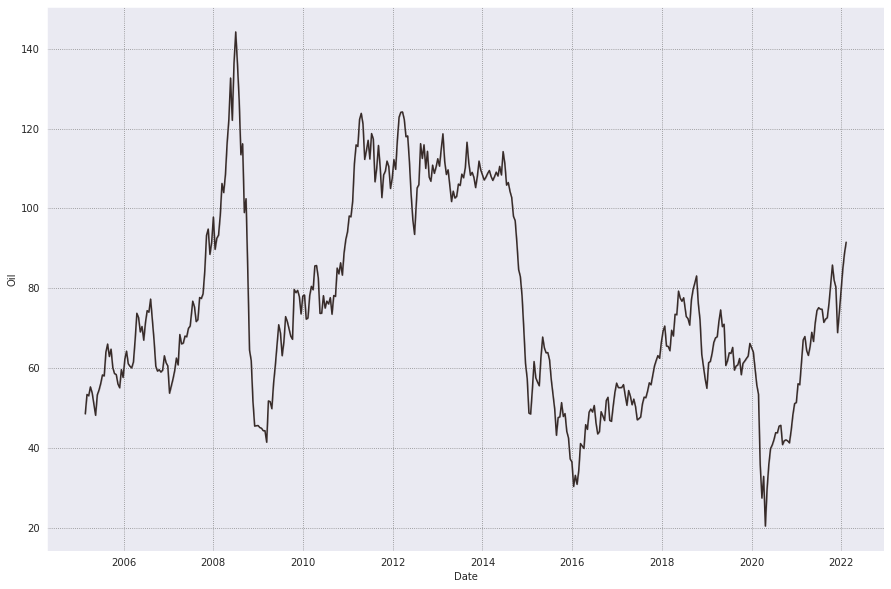

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid", rc={"grid.color": ".5", "grid.linestyle": ":",'xtick.labelsize':15,'ytick.labelsize':15} )
sns.lineplot(x=pure_df["Date"], y = pure_df["Oil"], color = '#372B29')

Relacja USD do EUR

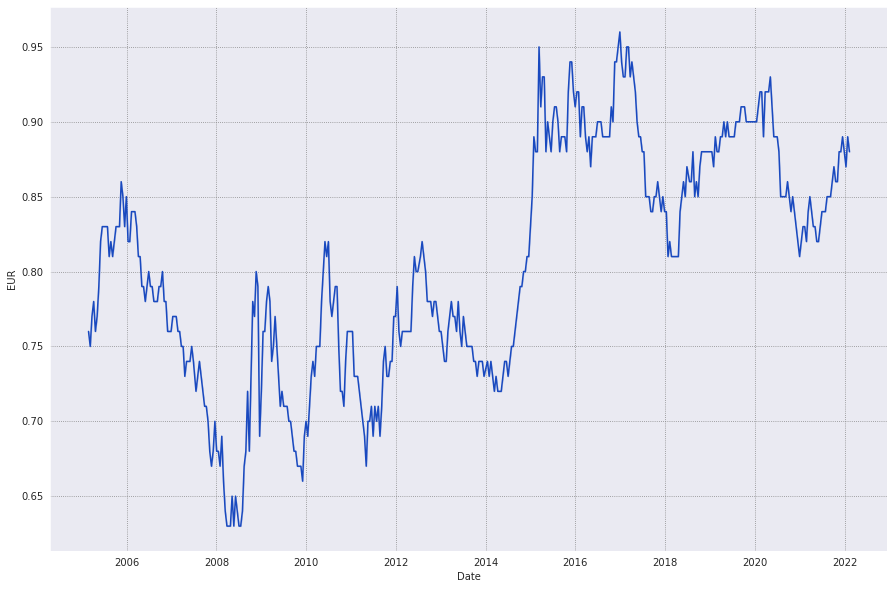

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid", rc={"grid.color": ".5", "grid.linestyle": ":",'xtick.labelsize':15,'ytick.labelsize':15} )
sns.lineplot(x=pure_df["Date"], y = pure_df["EUR"], color = '#1949BF')

Relacja USD do JPY

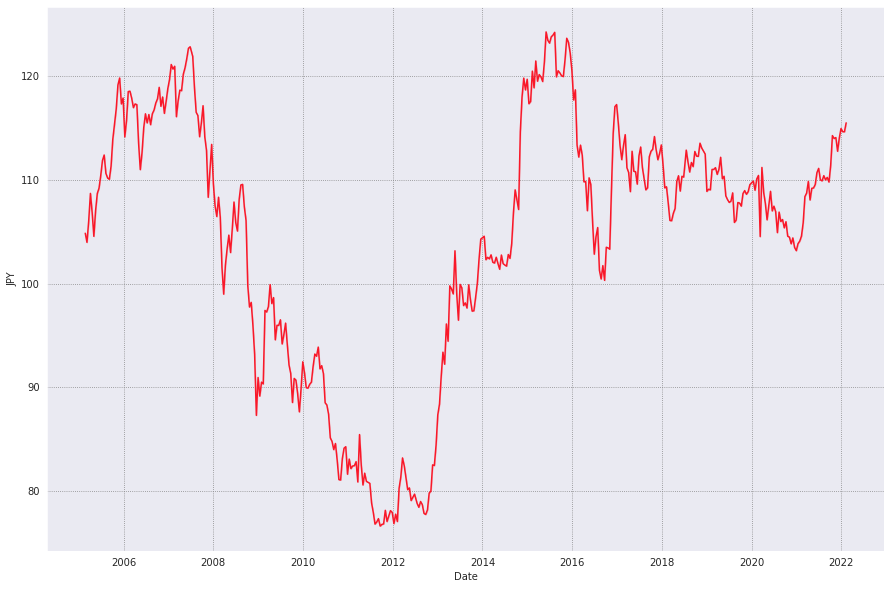

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid", rc={"grid.color": ".5", "grid.linestyle": ":",'xtick.labelsize':15,'ytick.labelsize':15} )
sns.lineplot(x=pure_df["Date"], y = pure_df["JPY"], color = '#F91829')